## Comparision based on overlay

This Notebook tries to compare different 2D correlation metrics.
The correlation value is a varying overlay $\alpha \in [0,1]$ of a value under investigation $X_1$ with a randomly generated value $X_2$, e.g. $Y=X_1 + (1-\alpha) * X_2$.
The result of the different correlation metrics is plotted.
Each metric is normalised onto the range [0,1].



In [1]:
x_title = "$\\alpha$"
y_title = "$corr(X_1,Y)$"

In [2]:
%matplotlib inline

import pycopcor.marginal as pcm
import pycopcor.copula.wolff as pcw
import pycopcor.copula.entropy as pce

import numpy
numpy.seterr(all="warn")

import matplotlib.pyplot as pp
import collections

import scipy.stats

import pymit


In [3]:
n = 10000

rng = numpy.random.default_rng()

ref = rng.normal(0,1,n)
f_ref = pcm.density(ref)
i_cd_ref_e = pce.empirical_2d(f_ref,f_ref)
i_cd_ref_h = pce.histogram_2d(f_ref,f_ref)

norm_gauss = lambda x: numpy.sqrt(1 - numpy.exp(-2*x))
norm_max_e = lambda x: x/i_cd_ref_e
norm_max_h = lambda x: x/i_cd_ref_h

print("i_cd_ref_e", i_cd_ref_e)
print("i_cd_ref_h", i_cd_ref_h)

i_cd_ref_e 2.2019707819066467
i_cd_ref_h 2.302585092994046


In [12]:
copula_funs = {
    "$I_{cd,e,NormGauss}$"  : (("tab:blue",     "."), lambda fx_0,fx_1: norm_gauss(pce.empirical_2d(fx_0,fx_1))), 
    "$I_{cd,h,NormGauss}$"  : (("tab:blue",     "x"), lambda fx_0,fx_1: norm_gauss(pce.histogram_2d(fx_0,fx_1))) , 
    "$I_{cd,e,NormMax}$"    : (("tab:orange",   "."), lambda fx_0,fx_1: norm_max_e(pce.empirical_2d(fx_0,fx_1))) , 
    "$I_{cd,h,NormMax}$"    : (("tab:orange",   "x"), lambda fx_0,fx_1: norm_max_h(pce.histogram_2d(fx_0,fx_1))) , 
    "$I_{\sigma}$"          : (("tab:green",    "x"), lambda fx_0,fx_1: pcw.sigma(fx_0,fx_1)) ,
    "$I_{\gamma}$"          : (("tab:red",      "x"), lambda fx_0,fx_1: pcw.gamma(fx_0,fx_1))
    }

other_funs = {
    "$|\\rho(X,Y)|$"        : (("tab:purple",   "v"), lambda x,y : numpy.abs(scipy.stats.pearsonr(x,y)[0])),
    "$I_{H,10}$"            : (("tab:brown",    "^"), lambda X,Y : pymit.I(X,Y,bins=10)),
    "$\\tau$"               : (("tab:olive",    "<"), lambda x,y : scipy.stats.kendalltau(x,y)[0]),
    #"$I_{H,20}$": ("r^", lambda X,Y : pymit.I(X,Y,bins=20)),
    #"$I_{H,100}$": ("g^", lambda X,Y : pymit.I(X,Y,bins=100)),
}


In [13]:

def process_data(alphas, create_data):
    results = collections.defaultdict(list)
    colors = {}

    for alpha in alphas:
        X, title = create_data(alpha, n)
        
        fx_0 = pcm.density(X[:,0])
        fx_1 = pcm.density(X[:,1])

        for key in copula_funs:
            c, fun = copula_funs[key]
            res = fun(fx_0, fx_1)
            results[key].append(res)
            colors[key] = c
        
        for key in other_funs:
            c, fun = other_funs[key]
            res = fun(X[:,0], X[:,1])
            results[key].append(res)
            colors[key] = c
    return results, colors, title

def plot_data(alphas, results, colors, title):
    pp.figure()

    pp.ylim([-0.1,1.1])
    pp.xlim([-0.1,1.1])

    for key in results:
        pp.plot(alphas,results[key],color=colors[key][0],marker=colors[key][1],linestyle="dotted" ,label=key)

    pp.plot(alphas,alphas, "--" ,label="Given alpha")
    pp.ylabel(y_title)
    pp.xlabel(x_title)
    pp.title(title)
    pp.legend()
    pp.show()



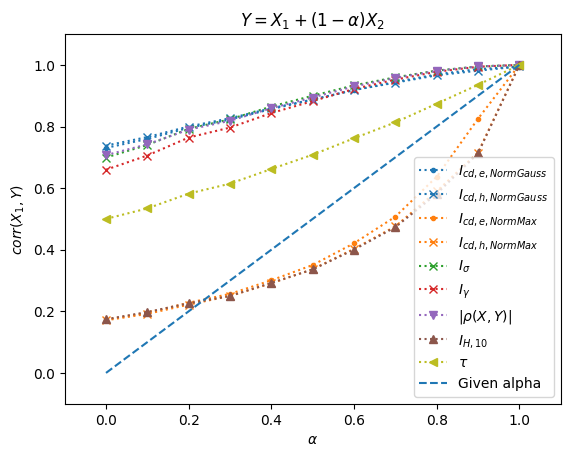

In [14]:
def create_data(alpha, n):
    rng = numpy.random.default_rng()
    X_1 = rng.uniform(low = 0, high = 1, size = n)
    X_2 = rng.uniform(low = 0, high = 1, size = n)
    
    Y = X_1 + (1 - alpha) * X_2
    
    x = numpy.asarray([X_1,Y]).transpose()
    return x, "$Y = X_1 + (1-\\alpha) X_2$"

alphas = numpy.linspace(0,1,11)
data_for_plot = process_data(alphas, create_data)

plot_data(alphas, *data_for_plot)

/tmp/ipykernel_543/2507732423.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  Y = X_1 + (1/(alpha) - 1) * X_2
/tmp/ipykernel_543/4141178298.py:10: RuntimeWarning: invalid value encountered in sqrt
  norm_gauss = lambda x: numpy.sqrt(1 - numpy.exp(-2*x))


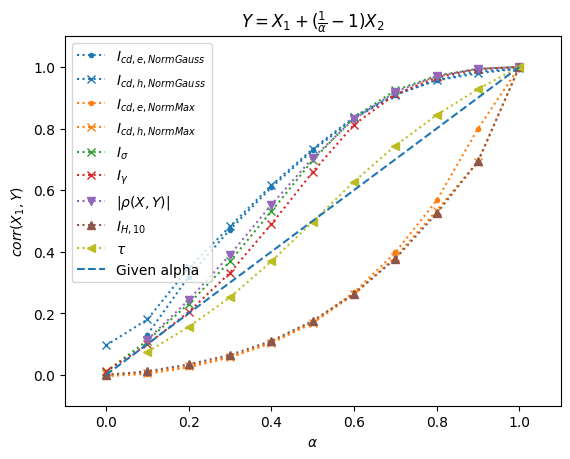

In [15]:
def create_data(alpha = 1, n = 10000):
    rng = numpy.random.default_rng()
    X_1 = rng.uniform(low = 0, high = 1, size = n)
    X_2 = rng.uniform(low = 0, high = 1, size = n)
    
    Y = X_1 + (1/(alpha) - 1) * X_2
    
    x = numpy.asarray([X_1,Y]).transpose()
    return x, "$Y = X_1 + (\\frac{1}{\\alpha} - 1) X_2$"

alphas = numpy.linspace(0,1,11)
data_for_plot = process_data(alphas, create_data)

plot_data(alphas, *data_for_plot)

/tmp/ipykernel_543/2833031108.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  Y = X_1 + X_2**(1/(alpha) - 1)


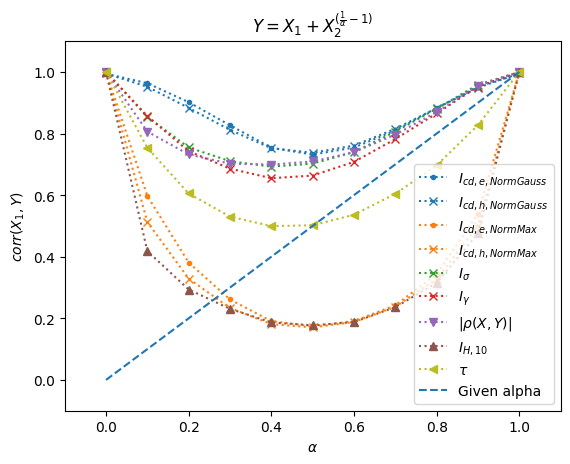

In [16]:
def create_data(alpha = 1, n = 10000):
    rng = numpy.random.default_rng()
    X_1 = rng.uniform(low = 0, high = 1, size = n)
    X_2 = rng.uniform(low = 0, high = 1, size = n)
    
    Y = X_1 + X_2**(1/(alpha) - 1)
    
    x = numpy.asarray([X_1,Y]).transpose()
    return x, "$Y = X_1 + X_2^{(\\frac{1}{\\alpha} - 1)}$"


alphas = numpy.linspace(0,1,11)
data_for_plot = process_data(alphas, create_data)

plot_data(alphas, *data_for_plot)

/tmp/ipykernel_543/3625704850.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  Y = X_1 + X_2**(alpha-1/(alpha))
/tmp/ipykernel_543/4141178298.py:10: RuntimeWarning: invalid value encountered in sqrt
  norm_gauss = lambda x: numpy.sqrt(1 - numpy.exp(-2*x))


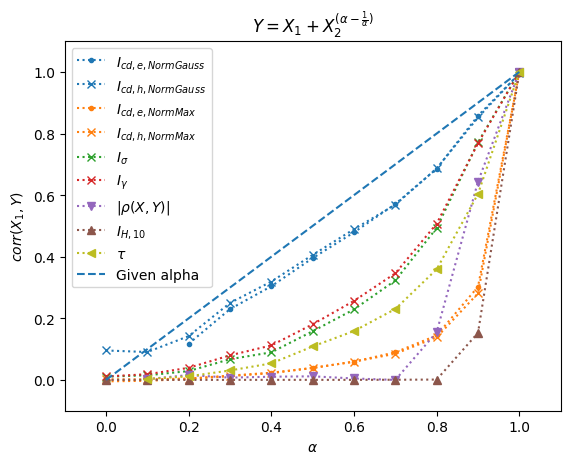

In [17]:
def create_data(alpha = 1, n = 10000):
    rng = numpy.random.default_rng()
    X_1 = rng.uniform(low = 0, high = 1, size = n)
    X_2 = rng.uniform(low = 0, high = 1, size = n)
    
    Y = X_1 + X_2**(alpha-1/(alpha))
    
    x = numpy.asarray([X_1,Y]).transpose()
    return x, "$Y = X_1 + X_2^{(\\alpha-\\frac{1}{\\alpha})}$"


alphas = numpy.linspace(0,1,11)
data_for_plot = process_data(alphas, create_data)

plot_data(alphas, *data_for_plot)

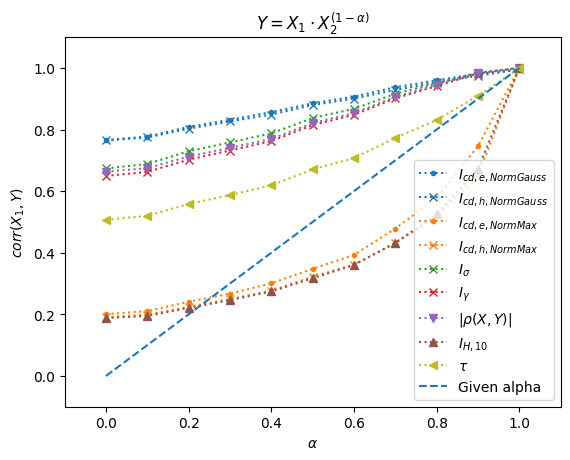

In [18]:
def create_data(alpha = 1, n = 10000):
    rng = numpy.random.default_rng()
    X_1 = rng.uniform(low = 0, high = 1, size = n)
    X_2 = rng.uniform(low = 0, high = 1, size = n)
    
    Y = X_1 * X_2**(1-alpha)
    
    x = numpy.asarray([X_1,Y]).transpose()
    return x, "$Y = X_1 \\cdot X_2^{(1-\\alpha)}$"


alphas = numpy.linspace(0,1,11)
data_for_plot = process_data(alphas, create_data)

plot_data(alphas, *data_for_plot)

/tmp/ipykernel_543/1072661310.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  Y = X_1 * X_2**(1-1/alpha)
/tmp/ipykernel_543/4141178298.py:10: RuntimeWarning: invalid value encountered in sqrt
  norm_gauss = lambda x: numpy.sqrt(1 - numpy.exp(-2*x))


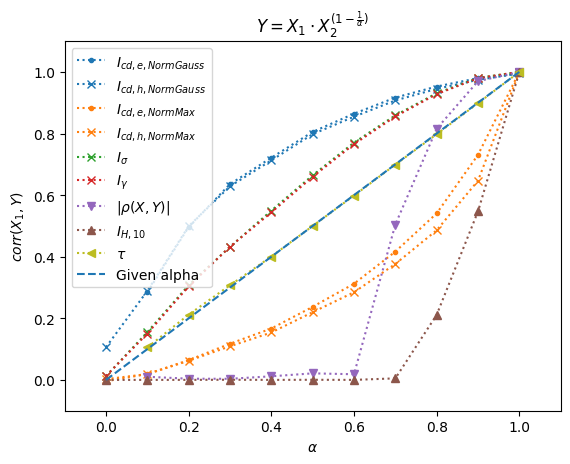

In [19]:
def create_data(alpha = 1, n = 10000):
    rng = numpy.random.default_rng()
    X_1 = rng.uniform(low = 0, high = 1, size = n)
    X_2 = rng.uniform(low = 0, high = 1, size = n)
    
    Y = X_1 * X_2**(1-1/alpha)
    
    x = numpy.asarray([X_1,Y]).transpose()
    return x, "$Y = X_1 \\cdot X_2^{(1-\\frac{1}{\\alpha})}$"


alphas = numpy.linspace(0,1,11)
data_for_plot = process_data(alphas, create_data)

plot_data(alphas, *data_for_plot)